## CountVectorizer

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [2]:
vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
print(vectorizer2.get_feature_names())
print(X2.toarray())

['and this', 'document is', 'first document', 'is the', 'is this', 'second document', 'the first', 'the second', 'the third', 'third one', 'this document', 'this is', 'this the']
[[0 0 1 1 0 0 1 0 0 0 0 1 0]
 [0 1 0 1 0 1 0 1 0 0 1 0 0]
 [1 0 0 1 0 0 0 0 1 1 0 1 0]
 [0 0 1 0 1 0 1 0 0 0 0 0 1]]


# TfidfVectorizer
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [4]:
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

In [5]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## 빅카인즈 데이터 분석

In [7]:
df = pd.read_excel('../data/NewsResult_20201027-20210127_경이로운 소문.xlsx')
df.head()

,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,20210127,YTN,김성현,"[Y터뷰①] 유준상 ""'경이로운 소문', 저의 새로운 시작 알리는 작품""",문화>미술_건축,문화>영화,문화>방송_연예,NaN,NaN,NaN,"옥자연,유준상,염혜란,김세정,조병규,이홍내,안석환",개성,"YTN,나무엑터스,OCN,닐슨코리아,필라테스","유준상,경이,소문,시작,작품,제목,경이,종영,OCN,경이,소문,마지막회,11%,닐슨...","유준상,웹툰,모탁,가모탁,ocn,배우들,조병규,한마디,감독님,시청자,시청률,닐슨코리...",제목 그대로 경이로웠다. \n\n지난 24일 종영한 OCN '경이로운 소문'은 마지...,https://www.ytn.co.kr/_sn/0117_202101270906420132,NaN
1,20210126,아주경제,장윤정,"[장윤정의 이슈in] 시즌제 드라마, 잇딴 성공의 비결은? '경이로운 소문, 펜트...",문화>방송_연예,문화>출판,문화>영화,범죄>범죄일반>방화,범죄>범죄일반>폭행,범죄>범죄일반>살인,"김,송혜교,김은희,현수,김순옥,이하나,금사월,장보리,송승헌,신용휘,신원호,이응복,김은숙","제주도,태평양","의대,일본,SBS,유튜브,JTBC,넷플릭스,서울대,OCN,화앤담픽쳐스,tvN,제작사...","시즌제,드라마,성공,비결,경이,소문,펜트하우스,펜트하우스,경이,소문,시즌,드라마,성...","시즌제,넷플릭스,스위트홈,시즌2,펜트하우스,송혜교,시즌1,ocn,시즌물,시청자,연출...","최근 펜트하우스, 경이로운 소문 등이 시즌제 드라마로 성공, 시청자들의 사랑을 받고...",http://www.ajunews.com/view/20210125155910313,NaN
2,20210125,경향신문,노정연 기자 dana_fm@kyunghyang.com,글로벌 시장 겨냥 ‘카카오엔터테인먼트’ 3월 출범,IT_과학>콘텐츠,경제>산업_기업,문화>문화일반,NaN,NaN,NaN,"김성수,이진수","이태원 클라쓰,원천","카카오M,카카오페이지,카카오,CJ E&M,카카오엔터테인먼트,신흥,제작사","글로벌,시장,겨냥,카카오엔터테인먼트,출범,웹툰,웹소설,카카오페이지,매니지먼트,제작사...","카카오페이지,웹툰,자회사,관계사,네트워크,카카오m,카카오엔터테인먼트,웹소설,ip,보...",웹툰 웹소설 기반 카카오페이지\n매니지먼트 제작사 둔 카카오M\n카카오 자회사 간 ...,http://news.khan.co.kr/kh_news/khan_art_view.h...,NaN
3,20210125,한국일보,안하늘,'K-웹툰+넷플릭스=흥행' 네이버 카카오가 드라마 제작 나서는 이유,IT_과학>콘텐츠,문화>영화,문화>방송_연예,NaN,NaN,NaN,최민하,"아시아,중동,미국,원천,유럽,한국","알리바바,카카오,네이버,카카오엔터,카카오엔터테인먼트,넷플릭스,네이버웹툰,스위트홈,삼...","K-웹툰,넷플릭스,흥행,네이버,카카오,드라마,제작,카카오페이지,카카오M,합병,카카오...","넷플릭스,ip,네이버,한국,웹툰,카카오페이지,자회사,스위트홈,제작사,카카오m,ott...","‘스위트홈’, ‘경이로운 소문’, ‘킹덤’, ‘이태원클라쓰’. \n최근 젊은 층을 ...",https://hankookilbo.com/News/Read/A20210125091...,NaN
4,20210125,매일경제,이남경,"김세정 “‘경이로운 소문’ OCN 최고 시청률, 한동안 안깨졌으면”[M+인터뷰①]",문화>방송_연예,문화>영화,문화>출판,NaN,NaN,NaN,"김세정,Q.",소감도,"아이라,MBN스타,도하나,OCN","김세정,경이,소문,시청률,OCN,최고,시청,한동안,인터뷰,경이,소문,김세정,터프,카...","김세정,한동안,ocn,대중문화부,카운터들,사람들,코로나19,친구들,시청률,일문일답,...",‘경이로운 소문’ 김세정이 터프함이 가득한 카리스마를 선보이며 걸크러시의 저력을 보...,http://star.mbn.co.kr/view.php?year=2021&no=78931,NaN


In [97]:
df.columns

Index(['일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3', '사건/사고 분류1',
       '사건/사고 분류2', '사건/사고 분류3', '인물', '위치', '기관', '키워드', '특성추출(가중치순 상위 50개)',
       '본문', 'URL', '분석제외 여부'],
      dtype='object')

In [8]:
df = df[['일자', '언론사', '인물', '위치', '특성추출(가중치순 상위 50개)']]
df.columns = ['일자', '언론사', '인물', '위치', '주제어']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      144 non-null    int64 
 1   언론사     144 non-null    object
 2   인물      129 non-null    object
 3   위치      112 non-null    object
 4   주제어     144 non-null    object
dtypes: int64(1), object(4)
memory usage: 5.8+ KB


일자를 datetime형태로 변환하고 년도/월을 컬럼(변수)로 생성

In [12]:
df['일자'] = df['일자'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d'))
df['년도']=df['일자'].apply(lambda x: x.year)
df['월']=df['일자'].apply(lambda x: x.month)
df

,일자,언론사,인물,위치,주제어,년도,월
0,2021-01-27,YTN,"옥자연,유준상,염혜란,김세정,조병규,이홍내,안석환",개성,"유준상,웹툰,모탁,가모탁,ocn,배우들,조병규,한마디,감독님,시청자,시청률,닐슨코리...",2021,1
1,2021-01-26,아주경제,"김,송혜교,김은희,현수,김순옥,이하나,금사월,장보리,송승헌,신용휘,신원호,이응복,김은숙","제주도,태평양","시즌제,넷플릭스,스위트홈,시즌2,펜트하우스,송혜교,시즌1,ocn,시즌물,시청자,연출...",2021,1
2,2021-01-25,경향신문,"김성수,이진수","이태원 클라쓰,원천","카카오페이지,웹툰,자회사,관계사,네트워크,카카오m,카카오엔터테인먼트,웹소설,ip,보...",2021,1
3,2021-01-25,한국일보,최민하,"아시아,중동,미국,원천,유럽,한국","넷플릭스,ip,네이버,한국,웹툰,카카오페이지,자회사,스위트홈,제작사,카카오m,ott...",2021,1
4,2021-01-25,매일경제,"김세정,Q.",소감도,"김세정,한동안,ocn,대중문화부,카운터들,사람들,코로나19,친구들,시청률,일문일답,...",2021,1
...,...,...,...,...,...,...,...
139,2020-11-12,매일경제,"염혜란,유준상,유선동,김세정,조병규,안석환","지구,한국,대한민국,독창","추매옥,카운터들,ocn,모탁,안석환,최장물,조병규,토일,소유자,김세정,유준상,대한민...",2020,11
140,2020-11-12,한국경제,"염혜란,유준상,김세정,조병규,안석환","지구,한국,대한민국,일,독창","조병규,추매옥,카운터들,모탁,안석환,유준상,ocn,최장물,염혜란,소유자,김세정,대한...",2020,11
141,2020-11-05,매일경제,강철구,"중국,장르","제작비,tvn,스튜디오드래곤,매출액,160억,영업이익,넷플릭스,ip,ocn,강철구,...",2020,11
142,2020-11-05,서울경제,강철구,중국,"스튜디오드래곤,수익성,제작비,160억,강철구,영업이익,관계자,영업익,중국,전자공시,...",2020,11


결측치 확인

In [13]:
df[df.isnull().any(axis=1)]

,일자,언론사,인물,위치,주제어,년도,월
5,2021-01-25,매일경제,"하사날,유준상,염혜란,도하나,김세정,조병규",NaN,"김세정,유준상,염혜란,아이유,만큼,부분들,액션신,대중문화부,조병규,코로나19,일문일...",2021,1
8,2021-01-24,YTN,"옥자연,스톤",NaN,"옥자연,지청신,시청률,ocn,감독님,배우들,시청자,케미,사이코패스,격투신,스톤,올리...",2021,1
10,2021-01-22,헤럴드경제,NaN,NaN,"코로나19,생활수칙,인천시교육청,교직원,도성훈,사람들,최소화,교육감,교육청,경각심,...",2021,1
22,2021-01-07,머니투데이,NaN,NaN,"웹툰,큐브엔터,만화가족,엔터,1편,관계자,넷플릭스,펜타곤,재판매,아이들,ott,여신...",2021,1
23,2021-01-07,머니투데이,황성진,NaN,"회복세,경쟁력,엔씨소프트,수익성,현대차증권,연구원,목표주가,cj,매출액,황성진,장기...",2021,1
32,2020-12-27,한국경제,조병규,NaN,"조병규,ocn,시청률,후반부,시청자,8회,한경닷컴,이준현,시청자들,안방극장,시청자분...",2020,12
33,2020-12-25,국민일보,김세정,NaN,"김세정,ocn,시청률,시청자,시청자들,카운터즈,눈물,악귀들,8회,레벨업,성원,전무후...",2020,12
34,2020-12-25,매일경제,유선동,NaN,"김세정,ocn,시청률,시청자,시청자들,카운터즈,레벨업,조병규,눈물,악귀들,성원,8회...",2020,12
36,2020-12-25,한국경제,NaN,NaN,"김세정,ocn,시청률,시청자,카운터즈,시청자들,조병규,한경닷컴,신지원,눈물,8회,악...",2020,12
52,2020-12-15,아주경제,"민규동,업텐션,이찬원",NaN,"코로나19,연예인,확산세,확진자,특성상,출연진,관계자,연예계,kbs2,안전지대,경각...",2020,12


In [14]:
df.dropna(axis=0, inplace=True)

중복 컬럼을 확인

In [15]:
df[df.duplicated(subset=['일자','언론사'])].head()

,일자,언론사,인물,위치,주제어,년도,월
30,2020-12-28,국민일보,"안은영,홍길동,이제훈,은영,주홍빈,한,연상호","일쑤,저주,거창,카타르,한국","히어로,히어,은영,히어로물,홍길동,안은영,보건교사,한국,철거민,인표,가해자,홍인표,...",2020,12
49,2020-12-16,경향신문,"<철,<철인,김소용,소문,신혜선","권선,이승,중국","철인왕후,김소용,시청률,시청자,조선시대,시청자들,ocn,신혜선,히어로물,조화진,조선...",2020,12
69,2020-11-27,매일경제,"김세정,염혜란,유선동,유준상,조병규",중계,"온라인,조병규,단체로,토일,발표회,제작발표회,sumur,유선동,사진제공,염혜란,김세...",2020,11
70,2020-11-27,매일경제,"김세정,염혜란,유선동,유준상,조병규",중계,"온라인,조병규,토일,발표회,제작발표회,sumur,포즈로,유선동,사진제공,염혜란,김세...",2020,11
71,2020-11-27,매일경제,"김세정,염혜란,유선동,유준상,조병규",중계,"조병규,온라인,김세정,토일,발표회,제작발표회,sumur,사진제공,유선동,코로나19,...",2020,11


In [17]:
df.drop_duplicates(subset=['일자','언론사'], keep="first").head()

,일자,언론사,인물,위치,주제어,년도,월
0,2021-01-27,YTN,"옥자연,유준상,염혜란,김세정,조병규,이홍내,안석환",개성,"유준상,웹툰,모탁,가모탁,ocn,배우들,조병규,한마디,감독님,시청자,시청률,닐슨코리...",2021,1
1,2021-01-26,아주경제,"김,송혜교,김은희,현수,김순옥,이하나,금사월,장보리,송승헌,신용휘,신원호,이응복,김은숙","제주도,태평양","시즌제,넷플릭스,스위트홈,시즌2,펜트하우스,송혜교,시즌1,ocn,시즌물,시청자,연출...",2021,1
2,2021-01-25,경향신문,"김성수,이진수","이태원 클라쓰,원천","카카오페이지,웹툰,자회사,관계사,네트워크,카카오m,카카오엔터테인먼트,웹소설,ip,보...",2021,1
3,2021-01-25,한국일보,최민하,"아시아,중동,미국,원천,유럽,한국","넷플릭스,ip,네이버,한국,웹툰,카카오페이지,자회사,스위트홈,제작사,카카오m,ott...",2021,1
4,2021-01-25,매일경제,"김세정,Q.",소감도,"김세정,한동안,ocn,대중문화부,카운터들,사람들,코로나19,친구들,시청률,일문일답,...",2021,1


In [18]:
df.drop_duplicates(subset=['일자','언론사'], keep="last").head()

,일자,언론사,인물,위치,주제어,년도,월
0,2021-01-27,YTN,"옥자연,유준상,염혜란,김세정,조병규,이홍내,안석환",개성,"유준상,웹툰,모탁,가모탁,ocn,배우들,조병규,한마디,감독님,시청자,시청률,닐슨코리...",2021,1
1,2021-01-26,아주경제,"김,송혜교,김은희,현수,김순옥,이하나,금사월,장보리,송승헌,신용휘,신원호,이응복,김은숙","제주도,태평양","시즌제,넷플릭스,스위트홈,시즌2,펜트하우스,송혜교,시즌1,ocn,시즌물,시청자,연출...",2021,1
2,2021-01-25,경향신문,"김성수,이진수","이태원 클라쓰,원천","카카오페이지,웹툰,자회사,관계사,네트워크,카카오m,카카오엔터테인먼트,웹소설,ip,보...",2021,1
3,2021-01-25,한국일보,최민하,"아시아,중동,미국,원천,유럽,한국","넷플릭스,ip,네이버,한국,웹툰,카카오페이지,자회사,스위트홈,제작사,카카오m,ott...",2021,1
4,2021-01-25,매일경제,"김세정,Q.",소감도,"김세정,한동안,ocn,대중문화부,카운터들,사람들,코로나19,친구들,시청률,일문일답,...",2021,1


In [19]:
df.set_index('일자')['주제어'].resample('W').count().plot(kind='bar', rot='45', figsize =(15,3))

C:\Users\NFSI291\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NFSI291\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NFSI291\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\NFSI291\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0, flags=flags)


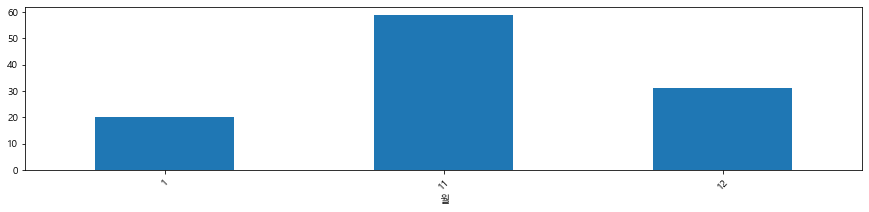

In [20]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic'
df.groupby('월')['주제어'].size().plot(kind='bar', rot='45', figsize =(15,3))

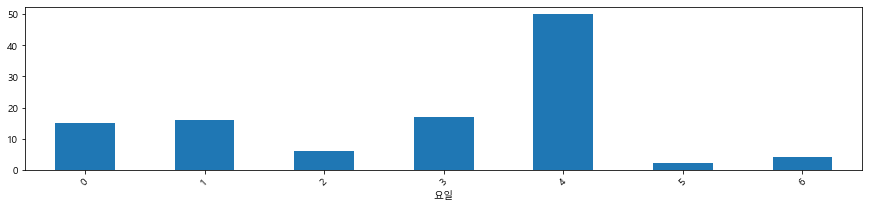

In [21]:
df['요일']=df['일자'].apply(lambda x: x.weekday())
df.groupby('요일')['주제어'].size().plot(kind='bar', rot='45', figsize =(15,3))

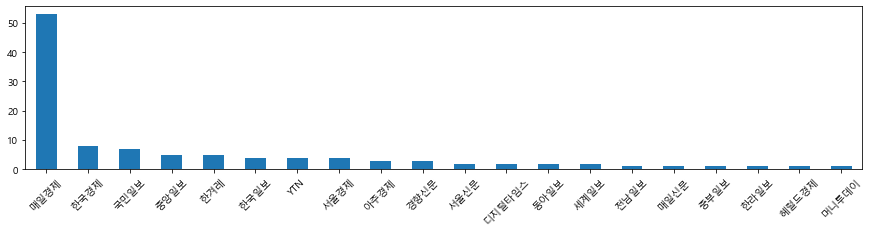

In [22]:
df.언론사.value_counts().plot(kind='bar', rot='45', figsize =(15,3)); plt.show()

In [24]:
df['주제어']

0      유준상,웹툰,모탁,가모탁,ocn,배우들,조병규,한마디,감독님,시청자,시청률,닐슨코리...
1      시즌제,넷플릭스,스위트홈,시즌2,펜트하우스,송혜교,시즌1,ocn,시즌물,시청자,연출...
2      카카오페이지,웹툰,자회사,관계사,네트워크,카카오m,카카오엔터테인먼트,웹소설,ip,보...
3      넷플릭스,ip,네이버,한국,웹툰,카카오페이지,자회사,스위트홈,제작사,카카오m,ott...
4      김세정,한동안,ocn,대중문화부,카운터들,사람들,코로나19,친구들,시청률,일문일답,...
                             ...                        
139    추매옥,카운터들,ocn,모탁,안석환,최장물,조병규,토일,소유자,김세정,유준상,대한민...
140    조병규,추매옥,카운터들,모탁,안석환,유준상,ocn,최장물,염혜란,소유자,김세정,대한...
141    제작비,tvn,스튜디오드래곤,매출액,160억,영업이익,넷플릭스,ip,ocn,강철구,...
142    스튜디오드래곤,수익성,제작비,160억,강철구,영업이익,관계자,영업익,중국,전자공시,...
143    스튜디오드래곤,제작비,강철구,160억,매출액,tvn,063억,ip,영업이익,코로나1...
Name: 주제어, Length: 110, dtype: object

In [23]:
from tqdm import tqdm_notebook

corpus = [] 
for fn in tqdm_notebook(df['주제어']) :
    corpus.append(fn)

print(f'문서의 개수는 {len(corpus)}')

C:\Users\NFSI291\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



문서의 개수는 110


In [111]:
len(corpus)

110

In [115]:
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
# ngram_range를 (1,2)를 사용할 경우 unigram 및 bigram 혼합 활용
vect = CountVectorizer(ngram_range=(1, 1), min_df= 0.005, max_df= 0.3)  
X = vect.fit_transform(corpus) # Doc-Term Matrix 계산
X = TfidfTransformer().fit_transform(X)

count = X.toarray().sum(axis=0) # Doc-Term Matrix 각 단어에 대한 합
idx = np.argsort(-count)
count = count[idx]

feature_name = np.array(vect.get_feature_names())[idx]
keyword_list = list(zip(feature_name, count))
result_df = pd.DataFrame(keyword_list)

plt.rcParams['font.family']='Malgun Gothic'

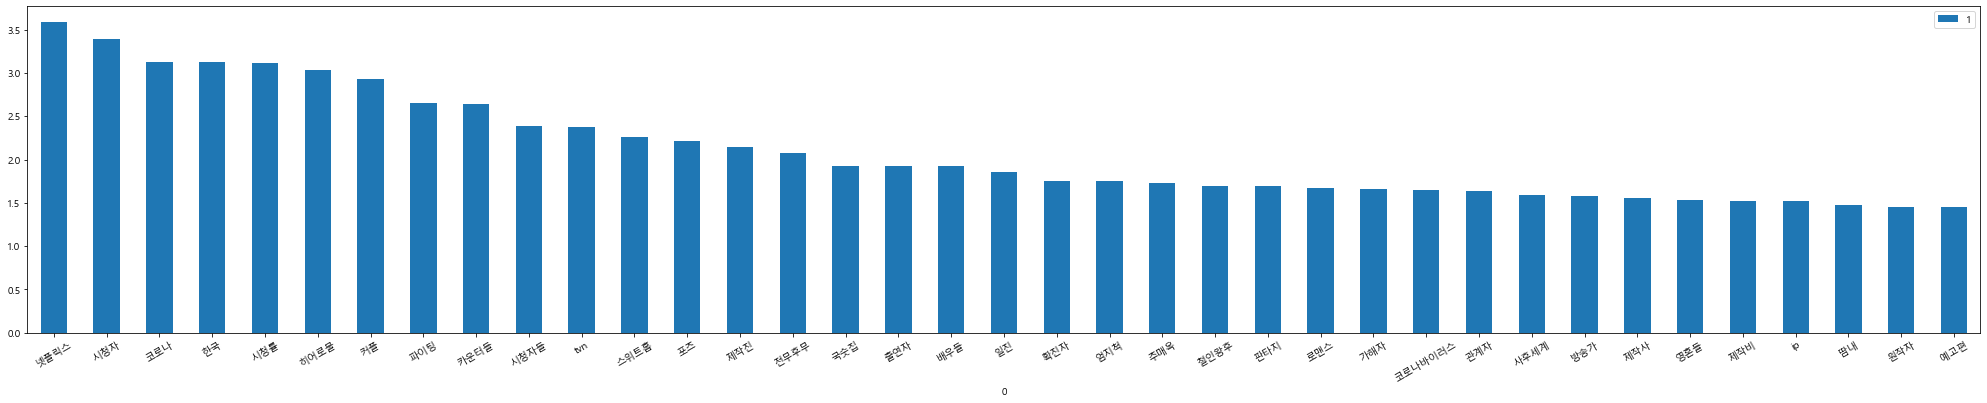

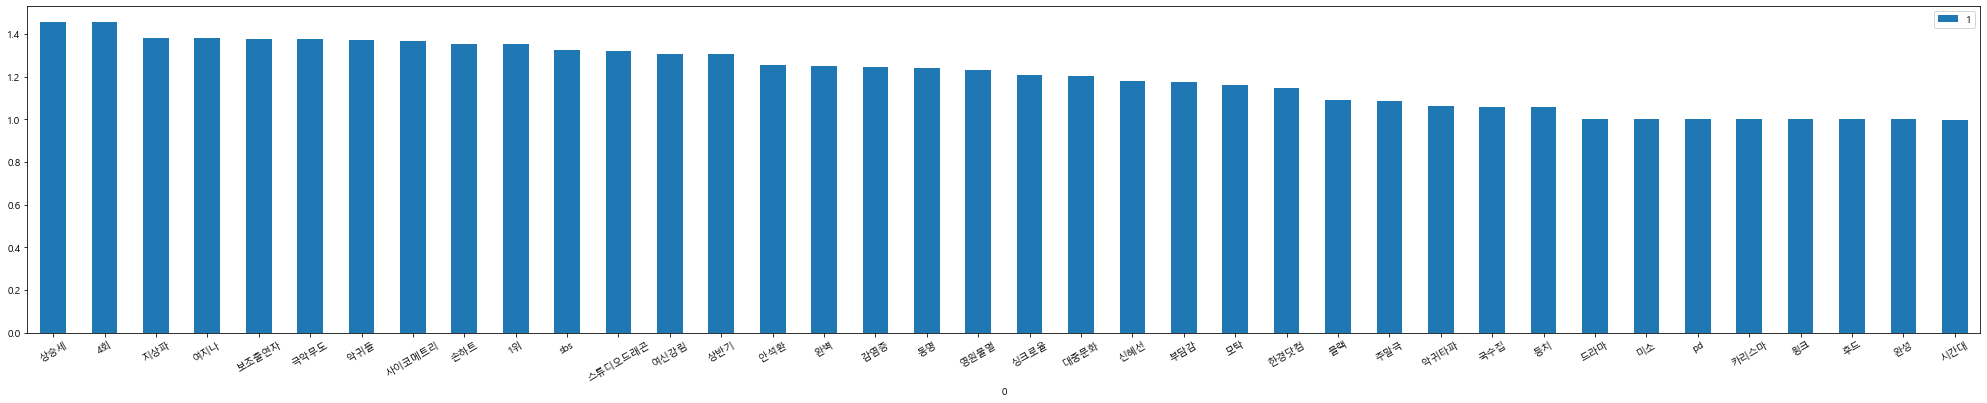

In [116]:
result_df.set_index(0)[0:37].plot(kind='bar', rot='30', figsize=(35,6))
result_df.set_index(0)[37:75].plot(kind='bar', rot='30', figsize=(35,6))

In [117]:
result_df.set_index(0)

,1
0,
넷플릭스,3.589149
시청자,3.391925
코로나,3.126608
한국,3.124940
시청률,3.119939
...,...
프리다,0.196019
오른쪽,0.196019
오랫동안,0.196019
